Scale factor: 1  (should be 1)
(2097152, 3)
new user added


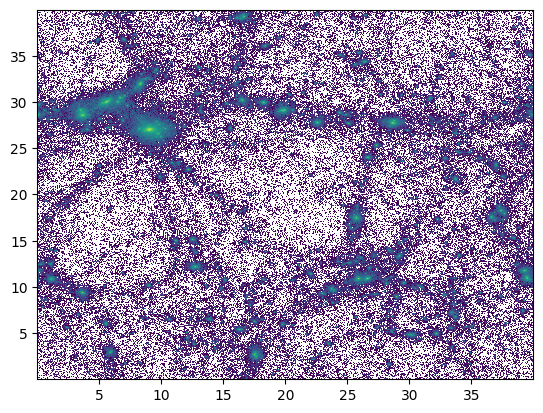

0.026718374166823395


In [6]:
import matplotlib.pyplot as plt
import numpy as np # useful for calculations
import h5py #required to read hdf5 files
import matplotlib as mpl

import pdb
FloatType = np.float64  # double precision: np.float64, for single use np.float32

def read_gadget_snapshot(file_name):
	data = h5py.File(file_name, 'r')  # load full hdf5 file

	time = FloatType(data['Header'].attrs['Time']) # the scale factor at which snapshot was written
	BoxSize = FloatType(data['Header'].attrs['BoxSize']) # box size in code units (Mpc)

	Pos = np.array(data['PartType1']['Coordinates'], dtype=FloatType) #3d Positions of all particles, e.g. x coord: Pos[:,0]

	mass = FloatType(data['Header'].attrs['MassTable'][1]) # mass of one DM particle

	n_particles = Pos.size // 3

	return time, Pos, mass, n_particles, BoxSize


file_name = "snapshot_002.hdf5"

time, Pos, mass, n_particles, BoxSize = read_gadget_snapshot(file_name)

print("Scale factor: %g  (should be 1)" %(time))

box_vol = BoxSize
mean_dist = (box_vol/n_particles)**(1/3)
print(Pos.shape)

x=Pos[:, 0]
y=Pos[:, 1]
z=Pos[:, 2]

print('new user added')

plt.hist2d(x, y, bins = 1000,  norm=mpl.colors.LogNorm())
plt.show()

print(mean_dist)
